In [23]:
%pylab inline

from misr_mead import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# MISR Nebraska Mead
## Exersice for retrieval of the state parameters and FAPAR by MISR

### Run main module

In [24]:
# save_dir = 'output/'
# misr_dir = 'data_misr/'
# etm_dir = 'data_landsat/'
# n_site = 1
# year = 2002
# lad = 2
# n_ang = 7
# lad = 2
# for n_site in [2, 3]:
#     for year in range(2001, 2009):
#         f_retval = save_dir + 'misr_etm_all_Ne%d_%d_ang%d.pkl' % (n_site, year, n_ang)
#         emul_dir = os.path.expanduser('~') + '/DATA/semidiscrete/lad%d/'%lad
#         run_mead(f_retval, save_dir, misr_dir, etm_dir, emul_dir, n_site=n_site, year=year, n_ang=n_ang, lad=lad)

#         (in_fapar_mean, in_fapar_sd, out_fapar_mean, out_fapar_sd) = do_fapar(save_dir, f_retval,\
#                                                                           n_site=n_site, year=year, lad=lad)

In [25]:
misr_dir = 'data_misr/'
year = 2002
n_site = 1
state_file_misr = misr_dir + 'US_Ne%d_%d_ang7.brf' % (n_site, year)
d = np.loadtxt(state_file_misr, skiprows=1)
doys_obs = np.unique(d[:,0]).astype(int)

In [26]:
def show_misr(retval_f):
    retval = pickle.load(open(retval_f, 'rb'))
    doys = np.arange(1,366)
    
    param = ['xlai', 'xhc', 'rpl', 'xkab', 'scen', 'xkw', 'xkm', 'xleafn', 'xs1', 'xs2']
    param_n = ['LAI', 'Height', 'Leaf diameter', 'Chlorophyll', 'Senescent',\
             'Leaf water', 'Dry matter', 'Leaf layers', 'Soil PC1', 'Soil PC2']
    param_m = ['$[-]$', '$m$', '$m$', '$mg/cm^2$', '$[-]$', '$cm$', '$mg/cm^2$', '$[-]$', '$[-]$', '$[-]$']
    
    for i in range(len(param)):
        subplot(10,1,i+1)
        # title(param[i])
        data = retval['real_map'][param[i]]
        plot(doys, data, lw=1.5, c='OrangeRed')
        fill_between(doys, retval['real_ci95pc'][param[i]], retval['real_ci5pc'][param[i]], facecolor='0.8')
        fill_between(doys, retval['real_ci75pc'][param[i]], retval['real_ci25pc'][param[i]], facecolor='0.6')
        #grid()
        #legend()
        ylabel(param_m[i], fontsize=16)
        xlim(1,365)
        annotate(param_n[i], xy=(310, min(data) + max(data)/8.),\
                 fontsize=16,\
                 bbox=dict(boxstyle="round", fc="0.95"))
        # ylim(0, 7)
        [plt.axvline ( doy, color="0.85" ) for doy in doys_obs ]

    subplots_adjust(right=2, top=4)
    
    print retval.keys()
    print retval['real_map'].keys()

### Show retrieved parameters

['real_ci95pc', 'real_map', 'real_ci75pc', 'real_ci25pc', 'real_ci5pc', 'transformed_map', 'post_sigma', 'hessian', 'post_cov']
['xlai', 'xhc', 'rpl', 'xkab', 'scen', 'xkw', 'xkm', 'xleafn', 'xs1', 'xs2']


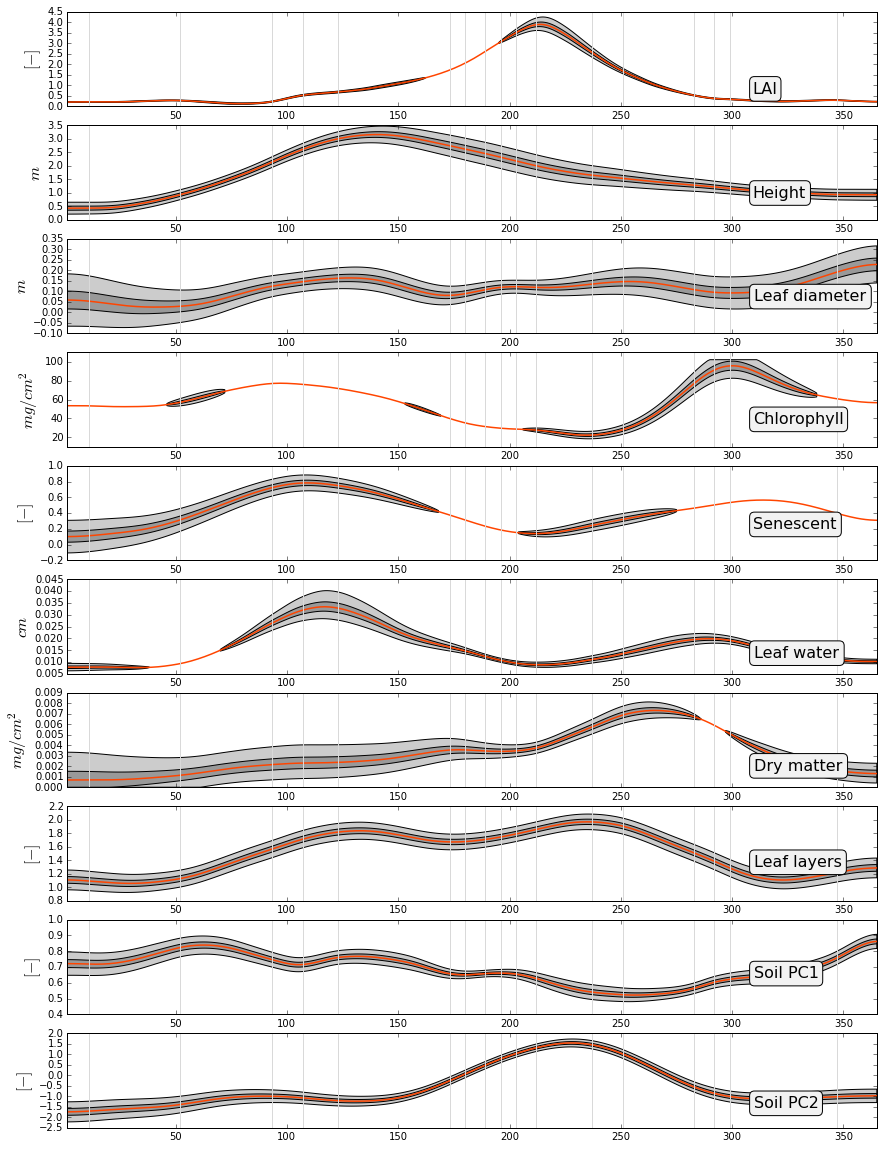

In [27]:
retval_f = 'output/misr_etm_all_Ne1_2002_ang7.pkl'
show_misr(retval_f)

In [28]:
fapar_in = np.loadtxt('output/output_fapar_mean/fapar_in_Ne1_2002.dat')
print fapar_in.shape
soil_a = fapar_in[:, 6]
lr = fapar_in[:, 10]
lt = fapar_in[:, 11]

(365, 12)


In [29]:
soil_a_sd = []
lr_sd = []
lt_sd = []
for i in range(1, 366):
    fapar_in_sd = np.loadtxt('output/output_fapar_sd/fapar_in_Ne1_2002_%d.dat'%i)
    soil_a_sd = np.append(soil_a_sd, np.std(fapar_in_sd[:, 6]))
    lr_sd = np.append(lr_sd, np.std(fapar_in[:, 10]))
    lt_sd = np.append(lt_sd, np.std(fapar_in[:, 11]))

### Show integrated parameters needed for FAPAR calculation

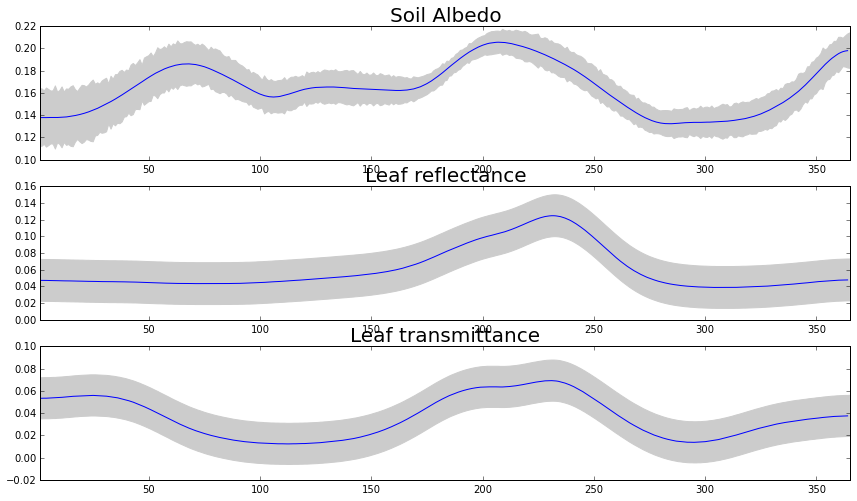

In [30]:
doys = np.arange(1, 366)
subplot(311)
title('Soil Albedo', fontsize=20)
fill_between(doys, soil_a+soil_a_sd, soil_a-soil_a_sd, color="0.8")
plot(soil_a)
xlim(1,365)

subplot(312)
title('Leaf reflectance', fontsize=20)
fill_between(doys, lr+lr_sd, lr-lr_sd, color="0.8")
plot(lr)
xlim(1,365)

subplot(313)
title('Leaf transmittance', fontsize=20)
fill_between(doys, lt+lt_sd, lt-lt_sd, color="0.8")
plot(lt)
xlim(1,365)


subplots_adjust(right=2, top=1.7)

### Plot FAPAR

(365,)
(366, 50)


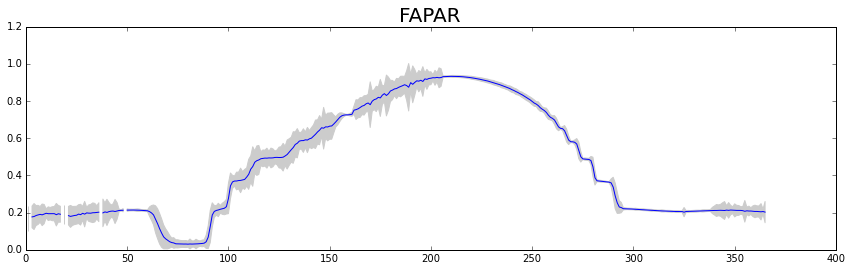

In [31]:
fapar_sd_0 = np.zeros(50)
for i in range(1,366):
    fapar_sd_0 = np.vstack((fapar_sd_0,\
                        np.loadtxt('output/output_fapar_nadim_sd/fapar_out_Ne1_2002_%d.dat'%i)))
title('FAPAR', fontsize=20)
fapar_sd = np.std(fapar_sd_0, axis=1)[1:]
fapar_mean = np.mean(fapar_sd_0, axis=1)[1:]
print fapar_sd.shape
print fapar_sd_0.shape
fill_between(doys, fapar_mean+fapar_sd, fapar_mean-fapar_sd, color="0.8")
plot(doys, fapar_mean)
subplots_adjust(right=2)

In [32]:
# Is it number or not
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

### Plot FAPAR filtered from NaNs

(1, 366)

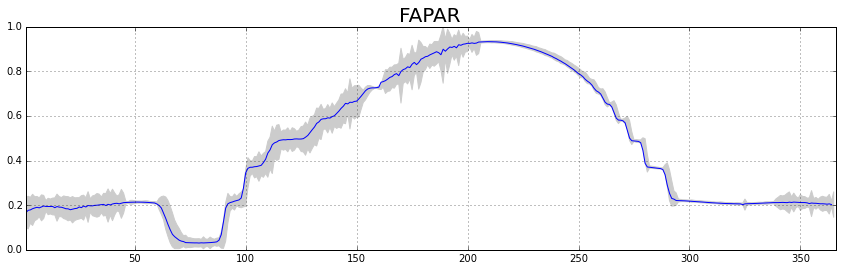

In [33]:
n_sites = 1
years = np.arange(2001, 2009)
fapar_mean = np.zeros((n_sites, years.shape[0], 365))
fapar_std = np.zeros((n_sites, years.shape[0], 365))
    
for ns in [1]:
    for y in range(years.shape[0]):
        f_name = 'output/output_fapar_nadim_mean/fapar_out_Ne%d_%d.dat'%(ns,years[y])
        if os.path.isfile(f_name):
            f = open(f_name, 'r')
            tmp_lst = f.read().split('\n')
            f.close()
            for s in range(len(tmp_lst)-1):
                fapar_mean[ns-1,y, s] = float(tmp_lst[s])
        else: print 'file '+f_name+' does not exist'
        
        for d in range(1,366):
            f_name = 'output/output_fapar_nadim_sd/fapar_out_Ne%d_%d_%d.dat'%\
            (ns, years[y], d)
            if os.path.isfile(f_name):
                f = open(f_name, 'r')
                tmp_lst = f.read().split('\n')
                f.close()
                fapar_eoldas_arr = np.zeros(len(tmp_lst)-1)
                for s in range(len(tmp_lst)-1):
                    str1 = tmp_lst[s].strip()
                    if is_number(str1):
                        if math.isnan(float(str1))==False:
                            fapar_eoldas_arr[s] = float(str1)
                        else: fapar_eoldas_arr[s] = fapar_eoldas_arr[s-1]
                    else: fapar_eoldas_arr[s] = fapar_eoldas_arr[s-1]
                #Smooth version of fapar_mean        
                fapar_mean[ns-1,y, d-1] = np.mean(fapar_eoldas_arr)
                if math.isnan(fapar_mean[ns-1,y, d-1]): print d
                fapar_std[ns-1,y, d-1] = np.std(fapar_eoldas_arr)
            else: print 'file ' + f_name + 'does not exist'

title('FAPAR', fontsize=20)
y = 1
fill_between(doys, fapar_mean[0, y, :]+fapar_std[0, y, :], fapar_mean[0, y, :]-fapar_std[0, y, :], color="0.8")
plot(fapar_mean[0, y, :])
subplots_adjust(right=2)
ylim(0,1)
grid()

xlim(1,366)